## Summary

Demonstrate how to create a popualtion, attach traits and produce meaningful phenotypes

In [1]:
## for local developement
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
import quickgsim as gsim

## Validate the pedigree class

In [44]:
ped = gsim.Pedigree()

In [45]:
lala = ped.read_ped_from_file("s_ped.csv",sep=' ')

Pedigree inlcudes 548 animals. In total, there are 218 sires and 318 dams and includes 34 and 54 base-sires/dams


In [38]:
amat = ped.get_Amat(ped.ped,method="numba")

In [39]:
print(amat.shape)
amat.diagonal()

(548, 548)


array([1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.       , 1.       , 1.       , 1.       , 

In [41]:
with open("diag_fromPython",'w') as fout:
    for d in amat.diagonal():
        fout.write(f"{d}\n")

In [47]:
s,d = [ped.ped[a][0] for a in ped.ped],[ped.ped[a][1] for a in ped.ped]
cp = ped.core_ped(set(s+d))

Will reduce pedigree size of 548 by keeping only the 537 parents provided
redcuded pedigree has now 536 animals coming from 208 sires and 308 dams


In [54]:
list(cp[0].keys())[-1]

4004265772529

In [2]:
## in this example, the genotypes are not important, so use equidistant genome for chrom 2,3,4 from Groenen et al 2009
#instructions = {2:[5870,154_400_000,3.124],3:[5010,113_600_000,2.687],4:[3800,94_000_000,2.024]}
instructions = {2:[58,154_400_000,3.124],3:[50,113_600_000,2.687],4:[38,94_000_000,2.024]}
genome = gsim.equidistant_genome(instructions)

added 58 variants in chromosome 2 [len in bp:154400000/morgans:3.124] equally spaced every 2708771 bp, ie every 5.48 centiMorgans
added 50 variants in chromosome 3 [len in bp:113600000/morgans:2.687] equally spaced every 2318367 bp, ie every 5.48 centiMorgans
added 38 variants in chromosome 4 [len in bp:94000000/morgans:2.024] equally spaced every 2540540 bp, ie every 5.47 centiMorgans


In [3]:
## use AReml estimates
bwt = gsim.pedTrait('bwt',97.8,190.4,mu=260)
print(bwt.name,bwt.h2,bwt.mu)

bwt 0.472007722007722 260


(array([  28.,  217.,  722., 1634., 2312., 1905.,  850.,  275.,   53.,
           4.]),
 array([210.93720358, 221.58929201, 232.24138044, 242.89346886,
        253.54555729, 264.19764572, 274.84973414, 285.50182257,
        296.153911  , 306.80599942, 317.45808785]),
 <BarContainer object of 10 artists>)

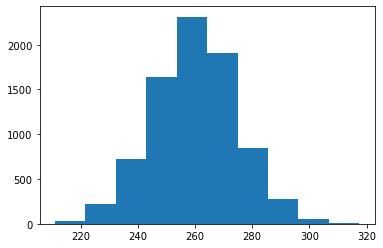

In [53]:
## I provide the actual mu as a fixed effect to make them look like actual BWT
plt.hist([bwt.get_phen(bwt.draw_bv(),fixed=0) for i in range(8000)])

(array([4.000e+00, 8.800e+01, 5.240e+02, 1.630e+03, 2.583e+03, 2.093e+03,
        8.740e+02, 1.840e+02, 1.800e+01, 2.000e+00]),
 array([-39.15946672, -30.81103804, -22.46260936, -14.11418067,
         -5.76575199,   2.58267669,  10.93110538,  19.27953406,
         27.62796274,  35.97639142,  44.32482011]),
 <BarContainer object of 10 artists>)

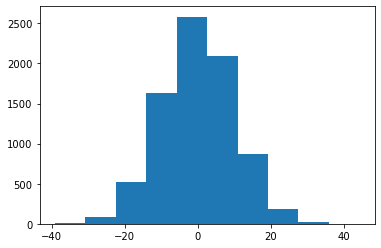

In [54]:
## however, the BVs have a mean of 0 as expected
plt.hist([bwt.draw_bv() for i in range(8000)])

### Setup the popualtion

I will setup a population using real pedigree and drop the pedigee

In [4]:
## First, get the pedigree using s1 scenario from /mnt/Pella/Processing/projects/GenForces/scenarios_quickgsim/s1/simulated/
ped = gsim.Pedigree()

In [5]:
sires,dams,basesires,basedams = ped.read_ped_from_file("ped_vce.txt",sep=" ")

Pedigree inlcudes 40435 animals. In total, there are 582 sires and 3801 dams and includes 208 and 1846 base-sires/dams


In [70]:
###BEWARE: fortran and numba are not returning the same inbreeidng. This is wrong. in additon the inbreeding seems low in borth cases 

fs = ped.get_inbreeding(ped.get_Amat(ped.ped,method="numba"))

(array([3.6395e+04, 2.8900e+03, 3.2200e+02, 2.9000e+01, 4.3400e+02,
        2.4200e+02, 6.0000e+01, 7.0000e+00, 0.0000e+00, 5.6000e+01]),
 array([1.       , 1.0253906, 1.0507812, 1.0761719, 1.1015625, 1.1269531,
        1.1523438, 1.1777344, 1.203125 , 1.2285156, 1.2539062],
       dtype=float32),
 <BarContainer object of 10 artists>)

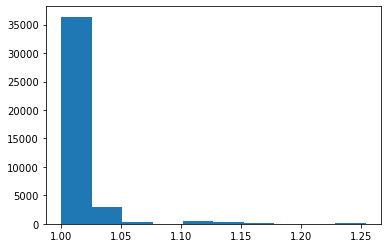

In [71]:
plt.hist(fs) ##numba

(array([3.7243e+04, 2.0520e+03, 2.6200e+02, 4.0000e+00, 7.1300e+02,
        8.4000e+01, 1.3000e+01, 0.0000e+00, 6.3000e+01, 1.0000e+00]),
 array([1.     , 1.03125, 1.0625 , 1.09375, 1.125  , 1.15625, 1.1875 ,
        1.21875, 1.25   , 1.28125, 1.3125 ], dtype=float32),
 <BarContainer object of 10 artists>)

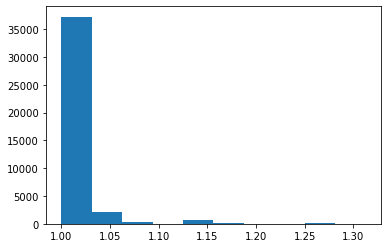

In [69]:
plt.hist(fs) ##fortran

In [6]:
## get the inbreeding
inbreeding = { tag:inbreed for tag,inbreed in zip(ped.ped.keys(),ped.get_inbreeding(ped.get_Amat(ped.ped,method="numba"))) }

In [12]:
## Now init the popualtion
pop = gsim.Pop(bwt)

In [13]:
## this allows me to register the base parents wtiout create two new big arrays in the memory 
def random_founders(pop,base_parents,sex,genome):
    for ptag in base_parents:
        pop.register_animals(gsim.generate_random_animals(1,sex,genome,tags=[ptag]))

In [14]:
## initialise the founders
random_founders(pop,basesires,1,genome)
random_founders(pop,basedams,2,genome)


In [16]:
### now generate the animals
for a,(s,d) in gsim.tqdm.tqdm(ped.ped.items()):
    if s and d:
        sex = None
        if a in sires:
            sex = 1
        if a in dams:
            sex = 2
        pop.produce_newAnimal(pop.animals[s],pop.animals[d],a,genome,kid_sex=sex,mod_len_genomes={'paternal':0.3,'maternal':0},progeny_inbreeding=0)
        

100%|████████████████████████████████████████████████████████████████████████████████████████████| 40435/40435 [00:27<00:00, 1474.17it/s]


In [24]:
### for the animals in the population, output the phenotypes
with open("phens_out.txt","w") as fout:
    for a in pop.animals:
        fout.write(f"{a} {ped.ped[a][0]} {ped.ped[a][1]} {round(pop.animals[a].phens.get('bwt',0),3)}\n")

In [18]:
pop.animals[4064189721394]

Animal(tag=4064189721394, sex=2, genotype={2: {0: array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0]), 1: array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0])}, 3: {0: array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0]), 1: array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0])}, 4: {0: array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1]), 1: array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 

In [100]:
a = pop.produce_newAnimal(pop.animals[3869133161426],pop.animals[3869130921519],3914169151761,genome,kid_sex=None,mod_len_genomes={'paternal':0.3,'maternal':0},progeny_inbreeding=0)

In [104]:
pop.animals[3914169151761]

Animal(tag=3914169151761, sex=2, genotype={2: {0: array([0, 1, 0, ..., 0, 0, 0]), 1: array([1, 1, 0, ..., 0, 1, 1])}, 3: {0: array([0, 1, 1, ..., 1, 0, 0]), 1: array([0, 0, 1, ..., 1, 1, 0])}, 4: {0: array([0, 1, 1, ..., 0, 0, 1]), 1: array([1, 1, 1, ..., 1, 0, 1])}}, pcr={2: [[0, 1], array([5522])], 3: [[1, 0], array([1306])], 4: [[1, 1], array([ 907, 2516, 2635, 2846])]}, mcr={2: [[1, 1], array([1855, 2308, 3454, 4056])], 3: [[1, 0], array([3141])], 4: [[1, 0], array([577])]}, phens={'bwt': 264.53034092278693}, bvs={'bwt': 4.292820589752793}, f=0)

In [75]:
inbreeding[4064189711655]

1.0039062

In [ ]:
def drop_pedigree(pop,genome,ped,store_backend=None):
    for kid,sire,dam,sex in tqdm.tqdm(ped):
        progeny = mate(pop[sire],pop[dam],kid,genome,sex)
        pop[kid] = progeny
        if store_backend:
            store_backend.store_animal(kid,sire,dam,sex,progeny)

In [19]:
m = gsim.generate_random_animals(1,1,genome,tags=[basesires[0]])

In [20]:
m[0]

Animal(tag=3869133161426, sex=1, genotype={2: {0: array([1, 1, 0, ..., 1, 0, 1]), 1: array([0, 0, 0, ..., 1, 0, 0])}, 3: {0: array([1, 1, 0, ..., 0, 1, 0]), 1: array([0, 0, 0, ..., 1, 0, 1])}, 4: {0: array([1, 0, 1, ..., 0, 0, 1]), 1: array([0, 0, 0, ..., 1, 0, 0])}}, pcr=[], mcr=[], phens={}, bvs={}, f=0.0)

In [32]:
females = gsim.generate_random_animals(10,2,genome)

In [105]:
%timeit gsim.mate(males[0],females[0],"34",genome)

1.1 ms ± 55.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
